# Análisis de Red de Transporte Aéreo

In [1]:
using DelimitedFiles
using Plots
pyplot()

Plots.PyPlotBackend()

In [2]:
using LightGraphs
using Distributions
using GLM
using DataFrames
using StatsBase

┌ Info: Recompiling stale cache file /Users/yuriko/.julia/compiled/v1.1/Distributions/xILW0.ji for Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1184
┌ Warning: Package Distributions does not have Test in its dependencies:
│ - If you have Distributions checked out for development and have
│   added Test as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Distributions
└ Loading Test into Distributions from project dependency, future warnings for Distributions are suppressed.
┌ Info: Recompiling stale cache file /Users/yuriko/.julia/compiled/v1.1/GLM/6OREG.ji for GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a]
└ @ Base loading.jl:1184


### Se crea tabla de información con nodos y enlaces

In [3]:
#SE IMPORTA LA LISTA DE AEROLÍNEAS
info_aerolineas = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/nueva_lista_aerolineas.csv", ',', String);
lista_aerolineas = info_aerolineas[:, 2]

526-element Array{String,1}:
 "Airlines"     
 "global"       
 "Star_Alliance"
 "Sky_Team"     
 "oneworld"     
 "AA"           
 "TK"           
 "DL"           
 "MU"           
 "CZ"           
 "UA"           
 "FR"           
 "BA"           
 ⋮              
 "H7"           
 "GY"           
 "EW"           
 "D6"           
 "7E"           
 "6Y"           
 "6I"           
 "5M"           
 "5G"           
 "4K"           
 "4D"           
 "4B"           

### Densidad de la red dirigida
$$ D(A, B) = \frac{|E|}{|V| ( |V| - 1 )}$$

con $A$ y $B$ conjuntos,  
$E$ los enlaces y  
$V$ los vértices

### Grado promedio de la red dirigida
$$ c = \frac{m}{n}$$

con  
$m$ los enlaces y  
$n$ los vértices

In [167]:
#NOMBRE DE LA AEROLÍNEA (ARCHIVO) ciclo for para todas las aerolíneas

tabla_info_net = ["Airline" "Nodes" "Links" "Density" "Av. Degree" "Av. Betweenness" " Global Clustering Coefficient" "Coverage" "Normalización"]

for i in 2:length(lista_aerolineas) #Desde el 2 para no tomar la primera entrada "Airlines"
    
    airline_code = lista_aerolineas[i] #Código
    aerolinea_matriz = string(airline_code, "_import_matrix.csv")
    leo_matriz = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/$airline_code/matriz/$aerolinea_matriz", Int64)
    
    nodos = size(leo_matriz)[1]
    enlaces = counts(leo_matriz)[2]
    
    denom = nodos * (nodos - 1)
    densidad = enlaces / denom
    
    aerolinea_in_degree = string(airline_code, "_in_degree.csv")
    #leo_in_degree = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/$airline_code/grados/$aerolinea_in_degree", Float64)
    promedio_degree = enlaces/nodos
    #datos_in_degree = push!(datos_in_degree, promedio_degree)
    
    grafo = DiGraph(leo_matriz)
    
    res = betweenness_centrality(grafo, endpoints=true)
    av_bet = mean(res)
    
    gcc = global_clustering_coefficient(grafo)

    aerolinea_cobertura = string(airline_code, "_layer_coverage.csv")
    leo_cobertura = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/$airline_code/cobertura/$aerolinea_cobertura", Float64)
    #coberturas = push!(coberturas, leo_cobertura[1])

    normalizacion = leo_cobertura / nodos
    
    renglon = [airline_code nodos enlaces densidad promedio_degree av_bet gcc leo_cobertura[1] normalizacion]
    tabla_info_net = vcat(tabla_info_net, renglon)
    
end

return tabla_info_net 

526×9 Array{Any,2}:
 "Airline"            "Nodes"  …     "Coverage"   "Normalización"
 "global"         3072            544.464        0.177234        
 "Star_Alliance"   934            384.997        0.412202        
 "Sky_Team"        900            289.527        0.321697        
 "oneworld"        698            142.492        0.204144        
 "AA"              259         …   58.159        0.224552        
 "TK"              242            232.862        0.96224         
 "DL"              230             68.1714       0.296398        
 "MU"              192            180.858        0.941967        
 "CZ"              188            127.036        0.675725        
 "UA"              184         …  121.458        0.660097        
 "FR"              176            164.743        0.936038        
 "BA"              175            174.089        0.994793        
 ⋮                             ⋱                                 
 "H7"                2              2.0          1.0    

In [212]:
"""
    visited_vertices(W::Array{Any,1})

La función caminos tiene como parámetro W que es un arreglo de arreglos.
Regresa los nodos diferentes a los que llega el caminante.
"""
function visited_vertices(W::Array{Any,1})

    cobert = []
    v = length(W) #tamaño de la matriz, número de nodos
    s = size(W[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    t = size(W[1], 2) #número de pasos, no necesario
    #visit = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    visit = []

    for i in 1:v
        for j in 1:s
            u = unique(W[i][j, :])
            push!(visit, u)
        end

        push!(cobert, visit)
        visit = []
    end

    return cobert
end

visited_vertices

In [205]:
caminatas = []
caminatas = push!(caminatas, leo_cobertura1)
caminatas = push!(caminatas, leo_cobertura2)
caminatas

2-element Array{Any,1}:
 [1.0 2.0 … 0.0 0.0; 1.0 2.0 … 0.0 0.0; … ; 1.0 2.0 … 0.0 0.0; 1.0 2.0 … 0.0 0.0]
 [2.0 0.0 … 0.0 0.0; 2.0 0.0 … 0.0 0.0; … ; 2.0 0.0 … 0.0 0.0; 2.0 0.0 … 0.0 0.0]

In [218]:
"""
    coverage(W::Array{Any,1})

La función cobertura tiene como parámetro W que es un arreglo de arreglos.
Regresa el número de nodos diferentes a los que llega el caminante.
"""
function coverage(W::Array{Any,1})

    cobert = []

    v = length(W) #tamaño de la matriz, número de nodos
    #@show v
    x = visited_vertices(W)
    #@show x
    s = size(x[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    longz = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones

    for i in 1:v
        for j in 1:s
            l = length(x[i][j])
            #@show l
            longz[j] = l
        end

        push!(cobert, longz)
        longz = zeros(Int64, s)
    end

    return cobert
end

coverage

In [219]:
coverage(caminatas)

2-element Array{Any,1}:
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3  …  3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [231]:

for i in 2:length(lista_aerolineas) #Desde el 2 para no tomar la primera entrada "Airlines"
    
   
    airline_code = lista_aerolineas[i] #Código
    #@show airline_code
    aerolinea_matriz = string(airline_code, "_which_endpoints.csv")
    leo_ep = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/$airline_code/visitas/$aerolinea_matriz")
    boool= isempty(leo_ep)
    #@show boool
    if boool == true
        epts = 0
        else epts = 1
    end
    
    renglon = [airline_code epts]
    @show renglon
    points = vcat(airline_code, epts)
    
end

return points

renglon = Any["global" 1]
renglon = Any["Star_Alliance" 1]
renglon = Any["Sky_Team" 1]
renglon = Any["oneworld" 1]
renglon = Any["AA" 1]
renglon = Any["TK" 1]
renglon = Any["DL" 1]


ErrorException: at row 0, column 0 : ArgumentError("number of rows in dims must be > 0, got 0")

## Ejemplo GLM (Linear regression)

In [6]:
data1 = DataFrame(X=[1,2,3], Y=[2,4,7])

,X,Y
,Int64,Int64
1,1,2
2,2,4
3,3,7


In [7]:
typeof(data1)

DataFrame

In [8]:
ols = lm(@formula(Y ~ X), data1)

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: Y ~ 1 + X

Coefficients:
              Estimate Std.Error  t value Pr(>|t|)
(Intercept)  -0.666667   0.62361 -1.06904   0.4788
X                  2.5  0.288675  8.66025   0.0732


# Función para encontrar la regresión lineal

In [9]:
function regresion_lineal(N::String, V::String)
    
    if N == "Global y Alianzas"
        k1 = 2
        k2 = 5
        
        elseif N == "Alianzas"
            k1 = 3
            k2 = 5
            
            elseif N == "Alianzas y Aerolíneas"
                k1 = 3
                k2 = length(lista_aerolineas)
   
                
                elseif N == "Aerolíneas"
                    k1 = 6
                    k2 = length(lista_aerolineas)
                
    end
    
    if V == "Nodes"
        c = 2
        t = Int64
        
        elseif V == "Links"
            c = 3
            t = Int64
            
            elseif V == "Density"
                c = 4
                t = Float64
                
                elseif V == "Av. Degree"
                    c = 5
                    t = Float64
                    
                    elseif V == "Av. Betweenness"
                        c = 6
                        t = Float64
                        
                        elseif V == "Global Clustering Coefficient"
                            c = 7
                            t = Float64
                            
                       
    end
    
    columna_x = tabla_info_net[:, c] #columna propiedad buscada, x
    x = columna_x[k1:k2]
    x = convert(Array{t,1}, x)
    
    columna_y = tabla_info_net[:, 8] #columna cobertura, y
    y = columna_y[k1:k2]
    y = convert(Array{Float64,1}, y)
    
    #y_cobertura = Array{Float64}(undef, 0)
    
    df_cov = hcat(x, y)
    df_cov = convert(DataFrame, df_cov)
    
    cov = lm(@formula(x2 ~ x1), df_cov)
    
    return cov
    
end

regresion_lineal (generic function with 1 method)

## Análisis de coberturas para Nodos 

### Encontramos la regresión lineal (Global y Alianzas)

In [10]:
reg_n_ga = regresion_lineal("Global y Alianzas", "Nodes")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error t value Pr(>|t|)
(Intercept)   159.523   93.8702  1.6994   0.2313
x1           0.129084 0.0551065 2.34245   0.1439


In [11]:
r_2 = round.(r2(reg_n_ga), digits=5)

0.73287

In [168]:
round.(stderror(reg_n_ga), digits=5);

In [14]:
round.(predict(reg_n_ga), digits=5);

### Gráfica de cobertura (Nodos vs. Cobertura. Global & Alianzas)

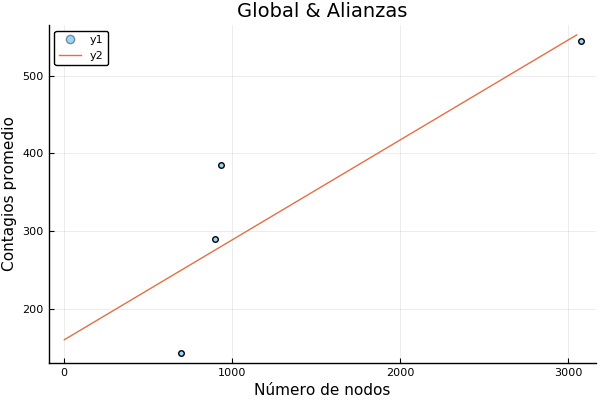

In [15]:
#x = ["Global", "Star Alliance", "Sky Team", "oneworld"]

w = tabla_info_net[:, 2] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]

equation(x) = 0.129*x + 159.523

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas",
    xlabel = "Número de nodos",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 1:3050, 
    legend = true)


y = [0.177234, 0.412202, 0.321697, 0.204144]


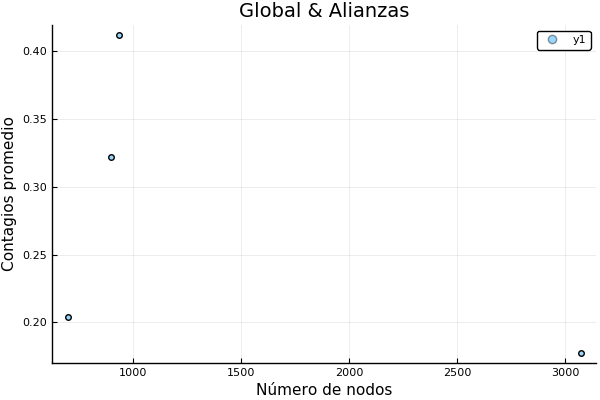

In [170]:
#x = ["Global", "Star Alliance", "Sky Team", "oneworld"]

w = tabla_info_net[:, 2] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]
@show y
equation(x) = 0.129*x + 159.523

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas",
    xlabel = "Número de nodos",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 1:3050, 
 #   legend = true)


## Análisis de coberturas (Alianzas)

### Encontramos la regresión

In [16]:
reg_n_al = regresion_lineal("Alianzas", "Nodes")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  -507.034   215.472 -2.35313   0.2558
x1           0.923427  0.253376   3.6445   0.1705


In [17]:
r_2 = round.(r2(reg_n_al), digits=5)

0.92998

In [18]:
round.(stderror(reg_n_al), digits=5);

In [19]:
round.(predict(reg_n_al), digits=5);

### Gráfica de cobertura (Nodos vs. Cobertura. Alianzas)

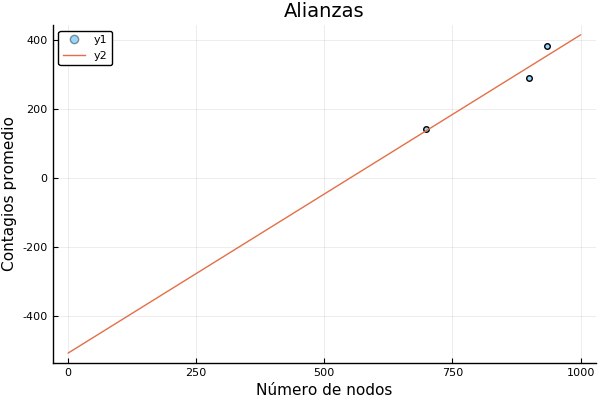

In [20]:
#x = ["Global", "Star Alliance", "Sky Team", "oneworld"]

w = tabla_info_net[:, 2] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

equation(x) = 0.923*x - 507.034

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas",
    xlabel = "Número de nodos",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 1:1000,
    legend = true)


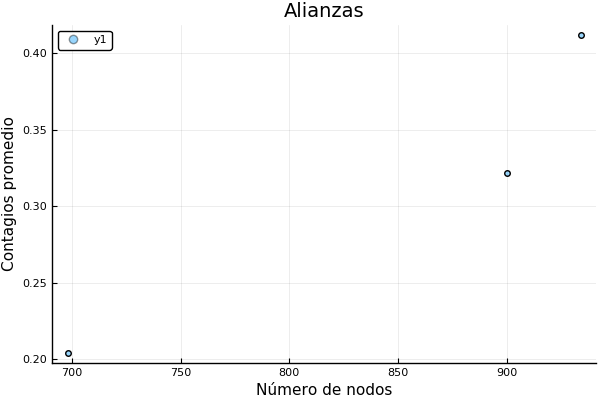

In [171]:
#x = ["Global", "Star Alliance", "Sky Team", "oneworld"]

w = tabla_info_net[:, 2] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

equation(x) = 0.923*x - 507.034

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas",
    xlabel = "Número de nodos",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 1:1000,
 #   legend = true)


El error en cuanto a la intersección es muy grande porque solo se tienen 3 puntos para la regresión lineal. 
Se podría decir que con mayor cantidad de nodos en la red de alianzas, la cobertura de contagios es mayor.

## Análisis de coberturas (Alianzas & Aerolíneas)

### Encontramos la regresión

In [21]:
reg_n_aa = regresion_lineal("Alianzas y Aerolíneas", "Nodes")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error t value Pr(>|t|)
(Intercept)   11.9271  0.945344 12.6166   <1e-31
x1           0.431932  0.011917  36.245   <1e-99


In [22]:
r_2 = round.(r2(reg_n_aa), digits=5)

0.71564

In [23]:
round.(stderror(reg_n_aa), digits=5);

In [24]:
round.(predict(reg_n_aa), digits=5);

### Gráfica de cobertura (Nodos vs. Cobertura. Alianzas & Aerolíneas)

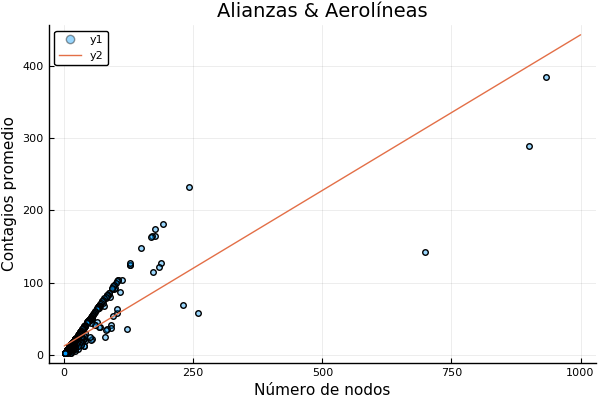

In [25]:
#x = ["Global", "Star Alliance", "Sky Team", "oneworld"]

w = tabla_info_net[:, 2] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Int64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = 0.432*x + 11.927

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas",
    xlabel = "Número de nodos",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:1000, 
    legend = true)


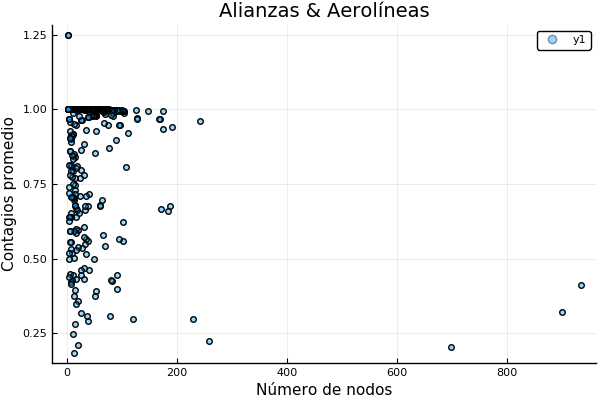

In [172]:
#x = ["Global", "Star Alliance", "Sky Team", "oneworld"]

w = tabla_info_net[:, 2] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Int64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = 0.432*x + 11.927

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas",
    xlabel = "Número de nodos",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:1000, 
#    legend = true)


## Análisis de coberturas (Aerolíneas)

### Encontramos la regresión

In [26]:
reg_n_aer = regresion_lineal("Aerolíneas", "Nodes")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error t value Pr(>|t|)
(Intercept)   2.51424  0.674643 3.72678   0.0002
x1           0.777509 0.0144998  53.622   <1e-99


In [27]:
r_2 = round.(r2(reg_n_aer), digits=5)

0.8471

In [28]:
round.(stderror(reg_n_aer), digits=5);

In [29]:
round.(predict(reg_n_aer), digits=5);

### Gráfica de cobertura (Nodos vs. Cobertura. Aerolíneas)

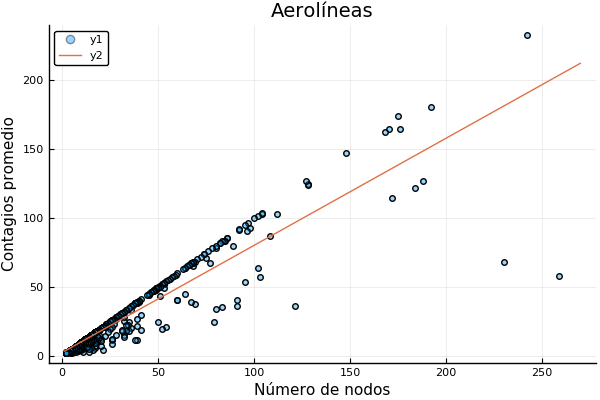

In [30]:
#x = ["Global", "Star Alliance", "Sky Team", "oneworld"]

w = tabla_info_net[:, 2] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Int64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = 0.777*x + 2.514

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas",
    xlabel = "Número de nodos",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 1:270, 
    legend = true)


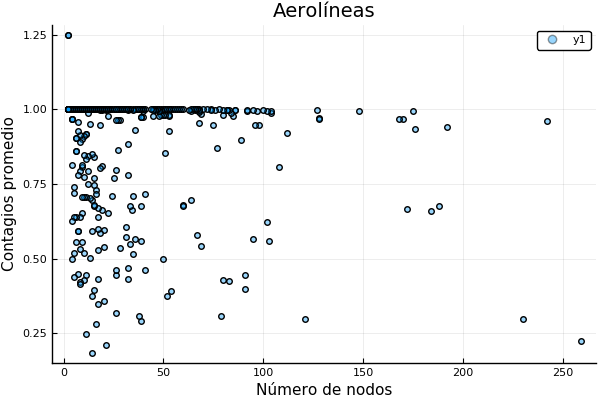

In [173]:
#x = ["Global", "Star Alliance", "Sky Team", "oneworld"]

w = tabla_info_net[:, 2] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Int64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = 0.777*x + 2.514

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas",
    xlabel = "Número de nodos",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 1:270, 
#    legend = true)


En general, en cuanto a la dependencia de la cobertura de contagios respecto al número de nodos de la red, es una lineal.

## Análisis de coberturas para Enlaces

### Encontramos la regresión lineal (Global y Alianzas)

In [31]:
reg_l_ga = regresion_lineal("Global y Alianzas", "Links")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
              Estimate  Std.Error t value Pr(>|t|)
(Intercept)    213.126    76.1256 2.79967   0.1074
x1           0.0103652 0.00442199 2.34403   0.1438


In [32]:
r_2 = round.(r2(reg_l_ga), digits=5)

0.73314

In [33]:
round.(stderror(reg_l_ga), digits=5);

In [34]:
round.(predict(reg_l_ga), digits=5);

### Gráfica de cobertura (Links vs. Cobertura. Global & Alianzas)

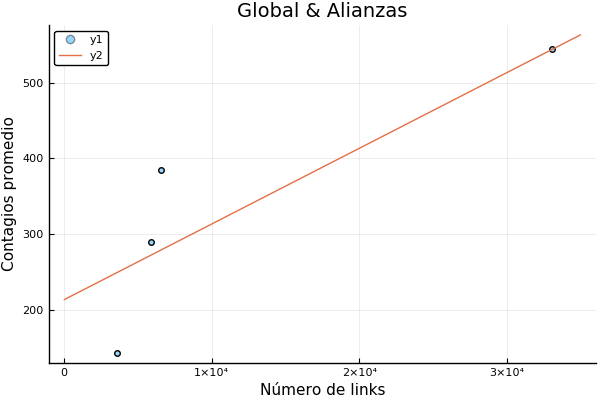

In [35]:
#x = ["Global", "Star Alliance", "Sky Team", "oneworld"]

w = tabla_info_net[:, 3] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]

equation(x) = 0.010*x + 213.126 #Cambiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas",
    xlabel = "Número de links",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 1:35000, 
    legend = true)


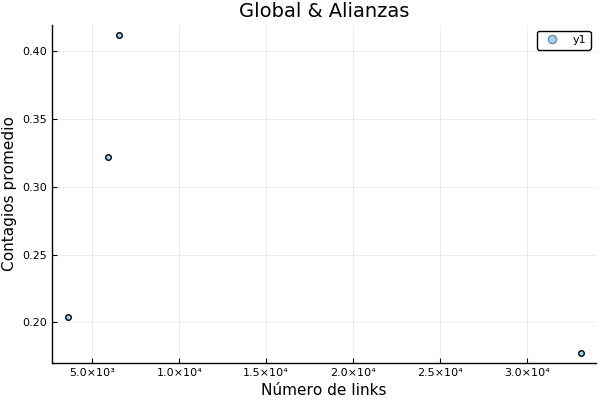

In [174]:
#x = ["Global", "Star Alliance", "Sky Team", "oneworld"]

w = tabla_info_net[:, 3] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]

equation(x) = 0.010*x + 213.126 #Cambiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas",
    xlabel = "Número de links",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 1:35000, 
 #   legend = true)


## Análisis de coberturas (Alianzas)

### Encontramos la regresión

In [36]:
reg_l_al = regresion_lineal("Alianzas", "Links")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
              Estimate Std.Error  t value Pr(>|t|)
(Intercept)   -138.752   78.4812 -1.76796   0.3277
x1           0.0770265 0.0143037  5.38506   0.1169


In [37]:
r_2 = round.(r2(reg_l_al), digits=5)

0.96667

In [38]:
round.(stderror(reg_l_al), digits=5);

In [39]:
round.(predict(reg_l_al), digits=5);

### Gráfica de cobertura (Links vs. Cobertura. Alianzas)

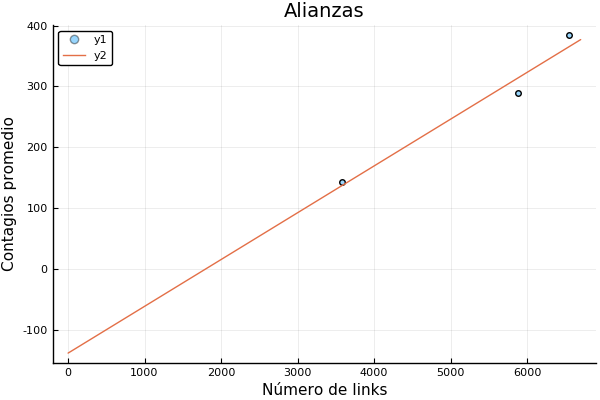

In [40]:
#x = ["Global", "Star Alliance", "Sky Team", "oneworld"]

w = tabla_info_net[:, 3] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

equation(x) = 0.077*x - 138.752 #CAmbiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas",
    xlabel = "Número de links",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 1:6700, 
    legend = true)


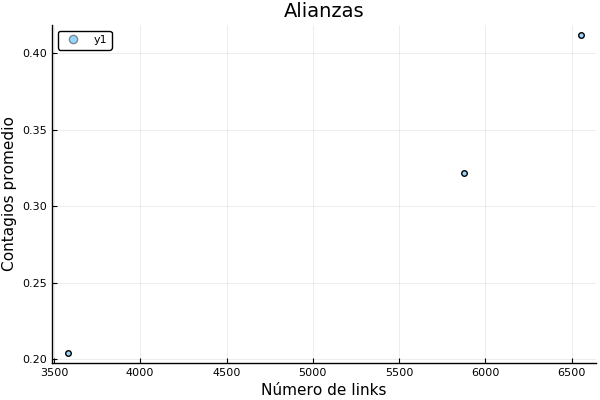

In [175]:
#x = ["Global", "Star Alliance", "Sky Team", "oneworld"]

w = tabla_info_net[:, 3] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

equation(x) = 0.077*x - 138.752 #CAmbiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas",
    xlabel = "Número de links",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 1:6700, 
 #   legend = true)


## Análisis de coberturas (Alianzas & Aerolíneas)

### Encontramos la regresión

In [41]:
reg_l_aa = regresion_lineal("Alianzas y Aerolíneas", "Links")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
              Estimate  Std.Error t value Pr(>|t|)
(Intercept)    18.7918    1.09017 17.2376   <1e-52
x1           0.0616749 0.00233674 26.3936   <1e-97


In [42]:
r_2 = round.(r2(reg_l_aa), digits=5)

0.57165

In [43]:
round.(stderror(reg_l_aa), digits=5);

In [44]:
round.(predict(reg_l_aa), digits=5);

### Gráfica de cobertura (Nodos vs. Cobertura. Alianzas & Aerolíneas)

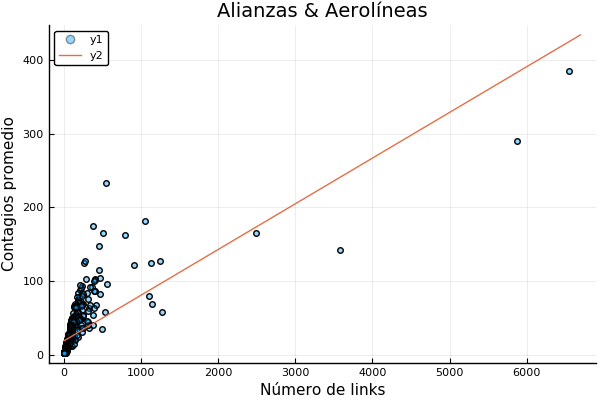

In [45]:
#x = ["Global", "Star Alliance", "Sky Team", "oneworld"]

w = tabla_info_net[:, 3] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Int64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = 0.062*x + 18.792 #CAMBIAr

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas",
    xlabel = "Número de links",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 1:6700, 
    legend = true)


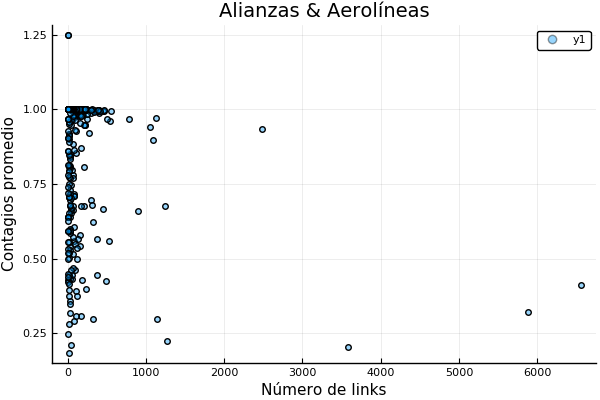

In [176]:
#x = ["Global", "Star Alliance", "Sky Team", "oneworld"]

w = tabla_info_net[:, 3] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Int64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = 0.062*x + 18.792 #CAMBIAr

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas",
    xlabel = "Número de links",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 1:6700, 
 #   legend = true)


## Análisis de coberturas (Aerolíneas)

### Encontramos la regresión

In [46]:
reg_l_aer = regresion_lineal("Aerolíneas", "Links")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate  Std.Error t value Pr(>|t|)
(Intercept)   13.7284   0.999864 13.7303   <1e-36
x1           0.120008 0.00468431 25.6191   <1e-93


In [47]:
r_2 = round.(r2(reg_l_aer), digits=5)

0.55842

In [48]:
round.(stderror(reg_l_aer), digits=5);

In [49]:
round.(predict(reg_l_aer), digits=5);

### Gráfica de cobertura (Links vs. Cobertura. Aerolíneas)

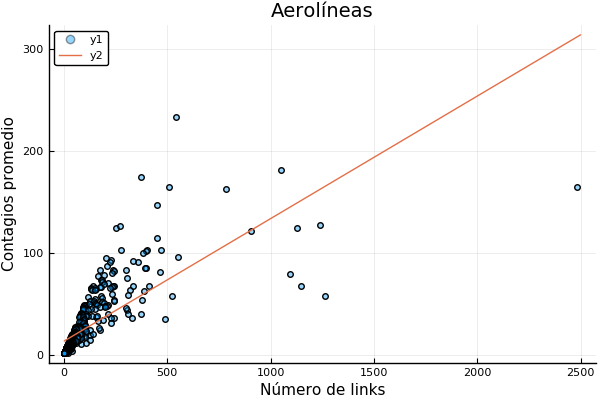

In [50]:
#x = ["Global", "Star Alliance", "Sky Team", "oneworld"]

w = tabla_info_net[:, 3] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Int64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = 0.120*x + 13.728 #CAMBUar

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas",
    xlabel = "Número de links",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 1:2500, 
    legend = true)


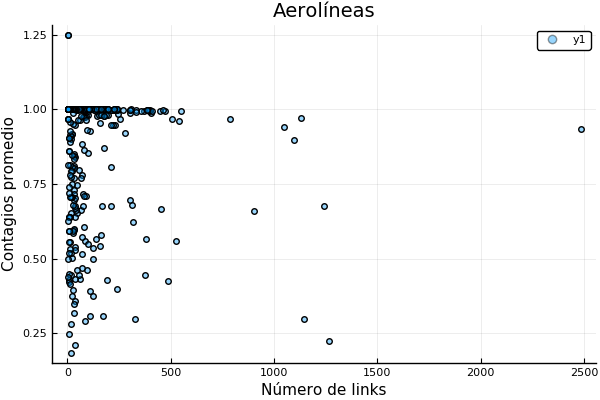

In [178]:
#x = ["Global", "Star Alliance", "Sky Team", "oneworld"]

w = tabla_info_net[:, 3] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Int64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = 0.120*x + 13.728 #CAMBUar

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas",
    xlabel = "Número de links",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 1:2500, 
#    legend = true)


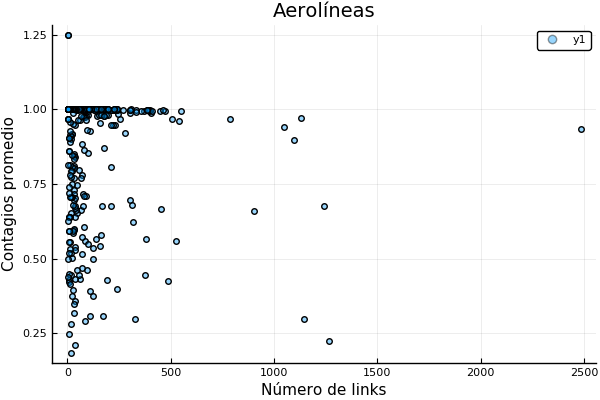

In [177]:
#x = ["Global", "Star Alliance", "Sky Team", "oneworld"]

w = tabla_info_net[:, 3] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Int64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = 0.120*x + 13.728 #CAMBUar

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas",
    xlabel = "Número de links",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 1:2500, 
 #   legend = true)


En general, en cuanto a la dependencia de la cobertura de contagios respecto al número de enlaces de la red, 
es una lineal, A mayor número de enlaces, mayor cobertura.

## Análisis de coberturas para Densidad

### Encontramos la regresión lineal (Global y Alianzas)

In [51]:
reg_d_ga = regresion_lineal("Global y Alianzas", "Density")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)    780.03   250.966  3.10812   0.0898
x1           -68562.1   37859.4 -1.81097   0.2118


In [52]:
r_2 = round.(r2(reg_d_ga), digits=5)

0.62118

In [53]:
round.(stderror(reg_d_ga), digits=5);

In [54]:
round.(predict(reg_d_ga), digits=5);

### Gráfica de cobertura (Densidad vs. Cobertura. Global & Alianzas)

x = [0.0035078, 0.00751989, 0.0072661, 0.00735654]
y = [544.464, 384.997, 289.527, 142.492]


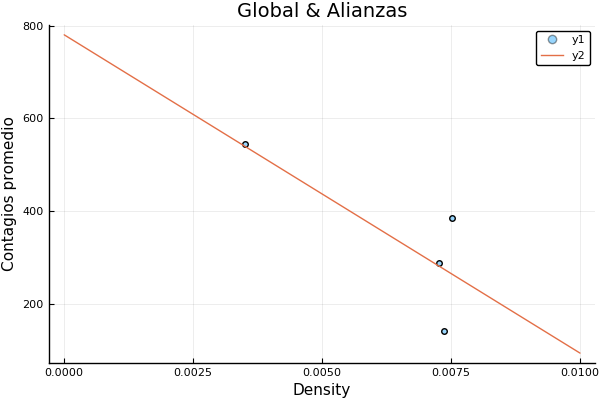

In [55]:

w = tabla_info_net[:, 4] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]
@show x
@show y

equation(x) = -68562.1*x + 780.03 #Cambiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas",
    xlabel = "Density",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.01:0.01, 
    legend = true)


## Análisis de coberturas (Alianzas)

### Encontramos la regresión

In [56]:
reg_d_al = regresion_lineal("Alianzas", "Density")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
              Estimate Std.Error   t value Pr(>|t|)
(Intercept)   -3485.61   5917.82 -0.589002   0.6611
x1           5.09149e5  801700.0  0.635087   0.6398


In [57]:
r_2 = round.(r2(reg_d_al), digits=5)

0.28741

In [58]:
round.(stderror(reg_d_al), digits=5);

In [59]:
round.(predict(reg_d_al), digits=5);

### Gráfica de cobertura (Density vs. Cobertura. Alianzas)

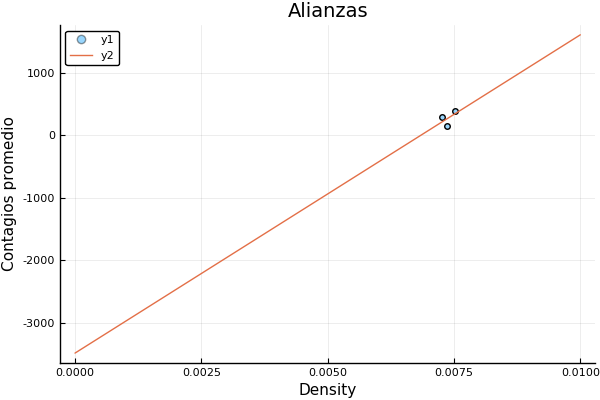

In [60]:
w = tabla_info_net[:, 4] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

equation(x) = 5.09149e5*x - 3485.61 #Cambiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas",
    xlabel = "Density",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.01:0.01, 
    legend = true)


## Análisis de coberturas (Alianzas & Aerolíneas)

### Encontramos la regresión

In [61]:
reg_d_aa = regresion_lineal("Alianzas y Aerolíneas", "Density")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)    43.308   2.02913  21.3432   <1e-72
x1            -69.635    5.9528 -11.6979   <1e-27


In [62]:
r_2 = round.(r2(reg_d_aa), digits=5)

0.2077

In [63]:
round.(stderror(reg_d_aa), digits=5);

In [64]:
round.(predict(reg_d_aa), digits=5);

### Gráfica de cobertura (Densidad vs. Cobertura. Alianzas & Aerolíneas)

y = [384.997, 289.527, 142.492, 58.159, 232.862, 68.1714, 180.858, 127.036, 121.458, 164.743, 174.089, 114.832, 164.455, 162.589, 147.271, 124.358, 124.08, 126.703, 36.0161, 103.175, 87.2556, 102.826, 103.401, 57.5134, 101.585, 63.6274, 99.929, 92.8034, 96.4642, 90.9184, 53.6273, 94.9513, 91.4754, 91.9151, 40.6397, 36.3565, 79.9581, 85.815, 85.7765, 83.0415, 82.9673, 35.2257, 82.9586, 81.8024, 81.9807, 78.5701, 34.3272, 79.9718, 24.4175, 78.0, 67.1239, 75.9093, 71.1104, 74.0, 73.9807, 72.0, 70.0, 37.5451, 68.0145, 67.6987, 64.9175, 68.0, 67.5022, 67.9312, 67.0, 38.7722, 67.0, 65.9511, 66.0, 66.0, 65.0, 63.7664, 44.5833, 64.0, 62.9349, 59.9902, 40.7242, 40.6255, 58.9902, 58.0, 57.0, 55.9907, 55.0, 53.9902, 21.1961, 51.9134, 53.0, 53.0, 52.0189, 52.9902, 49.1509, 19.5317, 52.0, 51.0, 51.0, 43.6275, 50.0196, 50.0, 24.9128, 49.02, 48.0204, 49.0, 48.9441, 47.9902, 48.0, 47.0208, 47.8283, 47.0, 47.0, 46.0, 45.9822, 44.0222, 45.0, 45.0, 44.9902, 44.0, 18.9512, 29.3902, 41.0, 39.8132, 39.025, 

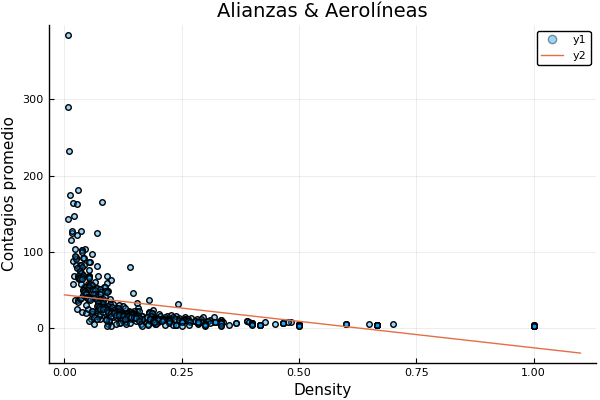

In [159]:
w = tabla_info_net[:, 4] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end
@show y

equation(x) = -69.635*x + 43.308 #Cambiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas",
    xlabel = "Density",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.01:1.1, 
    legend = true)


y = [5.95324, 5.66825, 4.95929, 4.06318, 5.45045, 4.22203, 5.19771, 4.84447, 4.79957, 5.10438, 5.15957, 4.74347, 5.10264, 5.09122, 4.99227, 4.82316, 4.82092, 4.84184, 3.58397, 4.63643, 4.46884, 4.63304, 4.63862, 4.05202, 4.62089, 4.15304, 4.60446, 4.53048, 4.56917, 4.50996, 3.98206, 4.55336, 4.51607, 4.52087, 3.70474, 3.59337, 4.3815, 4.45219, 4.45175, 4.41934, 4.41845, 3.56177, 4.41834, 4.40431, 4.40648, 4.36399, 3.53594, 4.38167, 3.1953, 4.35671, 4.20654, 4.32954, 4.26423, 4.30407, 4.3038, 4.27667, 4.2485, 3.62554, 4.21972, 4.21507, 4.17312, 4.21951, 4.21216, 4.2185, 4.20469, 3.6577, 4.20469, 4.18891, 4.18965, 4.18965, 4.17439, 4.15523, 3.79736, 4.15888, 4.1421, 4.09418, 3.70682, 3.7044, 4.07737, 4.06044, 4.04305, 4.02519, 4.00733, 3.9888, 3.05382, 3.94958, 3.97029, 3.97029, 3.95161, 3.97011, 3.8949, 2.97204, 3.95124, 3.93183, 3.93183, 3.77569, 3.91242, 3.91202, 3.21538, 3.89223, 3.87163, 3.89182, 3.89068, 3.871, 3.8712, 3.85059, 3.86762, 3.85015, 3.85015, 3.82864, 3.82825, 3.78469, 

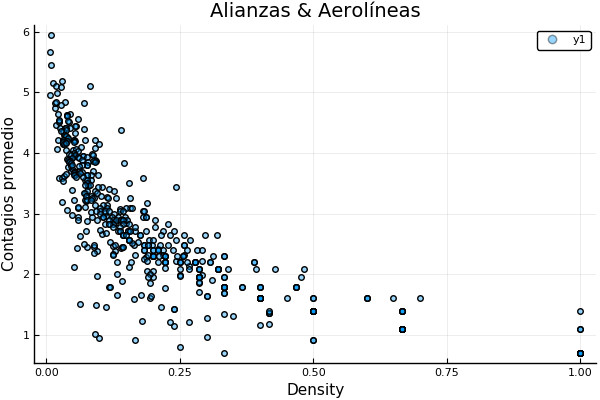

In [158]:
w = tabla_info_net[:, 4] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, log(c[i]))
end
@show y

#equation(x) = -69.635*x + 43.308 #Cambiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas",
    xlabel = "Density",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:0.01:1.1, 
 #   legend = true)


## Análisis de coberturas (Aerolíneas)

### Encontramos la regresión

In [66]:
reg_d_aer = regresion_lineal("Aerolíneas", "Density")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)   40.6698   1.66305   24.455   <1e-87
x1           -64.2252   4.86486 -13.2019   <1e-33


In [67]:
r_2 = round.(r2(reg_d_aer), digits=5)

0.25139

In [68]:
round.(stderror(reg_d_aer), digits=5);

In [69]:
round.(predict(reg_d_aer), digits=5);

### Gráfica de cobertura (Densidad vs. Cobertura. Aerolíneas)

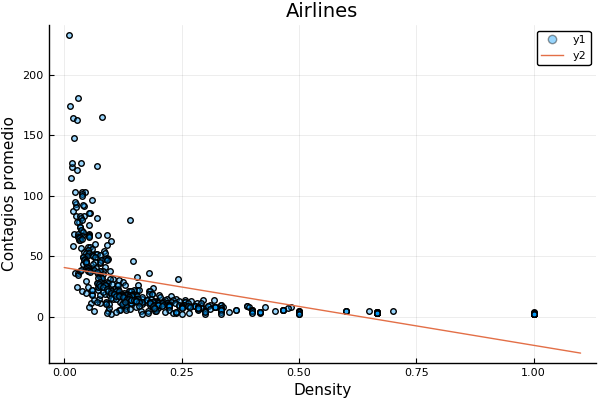

In [70]:

w = tabla_info_net[:, 4] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = -64.225*x + 40.670 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Airlines",
    xlabel = "Density",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.01:1.1, 
    legend = true)


## Análisis de coberturas para Grado prom.

### Encontramos la regresión lineal (Global y Alianzas)

In [71]:
reg_ad_ga = regresion_lineal("Global y Alianzas", "Av. Degree")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  -151.617   112.499 -1.34771   0.3101
x1            66.8273   14.7013  4.54566   0.0451


In [72]:
r_2 = round.(r2(reg_ad_ga), digits=5)

0.91175

In [73]:
round.(stderror(reg_ad_ga), digits=5);

In [74]:
round.(predict(reg_ad_ga), digits=5);

### Gráfica de cobertura (Grado vs. Cobertura. Global & Alianzas)

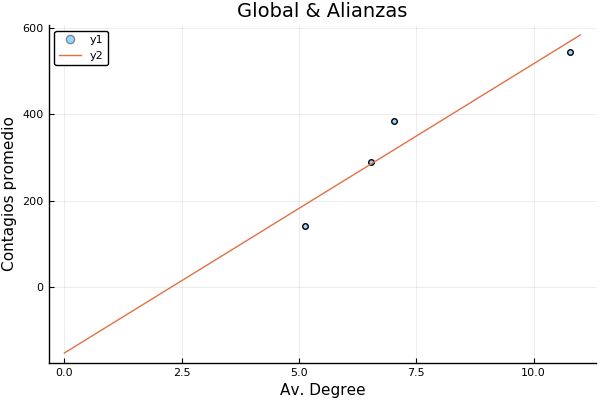

In [75]:
#x = ["Global", "Star Alliance", "Sky Team", "oneworld"]

w = tabla_info_net[:, 5] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]

equation(x) = 66.8273*x - 151.617  #

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas",
    xlabel = "Av. Degree",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:1:11, 
    legend = true)


## Análisis de coberturas (Alianzas)

### Encontramos la regresión

In [76]:
reg_ad_al = regresion_lineal("Alianzas", "Av. Degree")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)   -493.93   118.556 -4.16621   0.1500
x1             123.09   18.8886  6.51662   0.0969


In [77]:
r_2 = round.(r2(reg_ad_al), digits=5)

0.97699

In [78]:
round.(stderror(reg_ad_al), digits=5);

In [79]:
round.(predict(reg_ad_al), digits=5);

### Gráfica de cobertura (Grado vs. Cobertura. Alianzas)

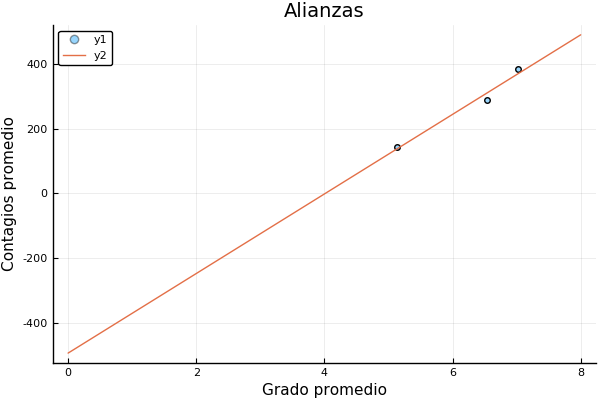

In [80]:
#x = ["Global", "Star Alliance", "Sky Team", "oneworld"]

w = tabla_info_net[:, 5] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

equation(x) = 123.09*x - 493.93 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas",
    xlabel = "Grado promedio",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:8, 
    legend = true)


## Análisis de coberturas (Alianzas & Aerolíneas)

### Encontramos la regresión

In [81]:
reg_ad_aa = regresion_lineal("Alianzas y Aerolíneas", "Av. Degree")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  -13.7978   2.81244 -4.90598    <1e-5
x1             16.721   1.03369   16.176   <1e-47


In [82]:
r_2 = round.(r2(reg_ad_aa), digits=5)

0.3339

In [83]:
round.(stderror(reg_ad_aa), digits=5);

In [84]:
round.(predict(reg_ad_aa), digits=5);

### Gráfica de cobertura (Grado vs. Cobertura. Alianzas & Aerolíneas)

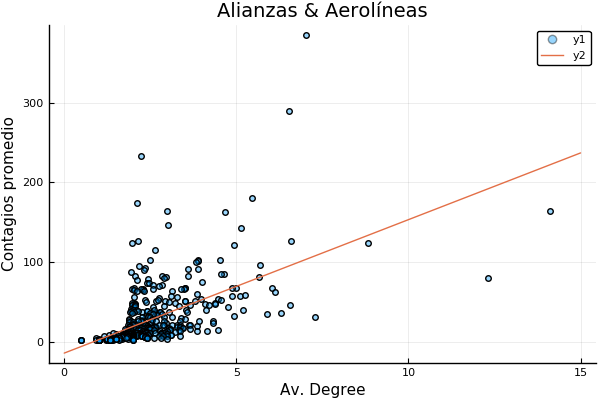

In [85]:

w = tabla_info_net[:, 5] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = 16.721*x - 13.7978 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas",
    xlabel = "Av. Degree",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:1:15, 
    legend = true)


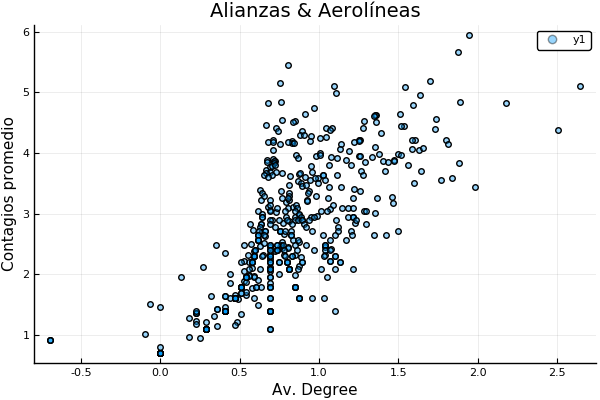

In [165]:

w = tabla_info_net[:, 5] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, log(w[i]))
    y = push!(y, log(c[i]))
end


#equation(x) = 16.721*x - 13.7978 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas",
    xlabel = "Av. Degree",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:1:15, 
 #   legend = true)


## Análisis de coberturas (Aerolíneas)

### Encontramos la regresión

In [86]:
reg_ad_aer = regresion_lineal("Aerolíneas", "Av. Degree")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  -7.94881    2.4391 -3.25891   0.0012
x1            13.8297  0.907844  15.2335   <1e-42


In [87]:
r_2 = round.(r2(reg_ad_aer), digits=5)

0.30898

In [88]:
round.(stderror(reg_ad_aer), digits=5);

In [89]:
round.(predict(reg_ad_aer), digits=5);

### Gráfica de cobertura (Grado vs. Cobertura. Aerolíneas)

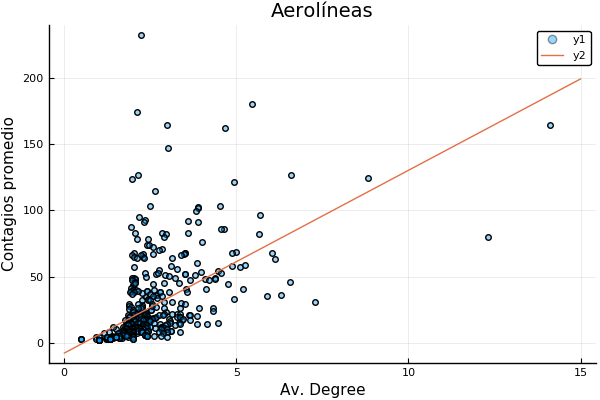

In [90]:

w = tabla_info_net[:, 5] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = 13.8297*x - 7.94881 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas",
    xlabel = "Av. Degree",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:15, 
    legend = true)


## Análisis de coberturas para Betweenness

### Encontramos la regresión lineal (Global y Alianzas)

In [91]:
reg_ab_ga = regresion_lineal("Global y Alianzas", "Av. Betweenness")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)    708.06   75.7326  9.34947   0.0112
x1           -86244.9   16586.3 -5.19977   0.0351


In [92]:
r_2 = round.(r2(reg_ab_ga), digits=5)

0.93112

In [93]:
round.(stderror(reg_ab_ga), digits=5);

In [94]:
round.(predict(reg_ab_ga), digits=5);

### Gráfica de cobertura (Betweenness vs. Cobertura. Global & Alianzas)

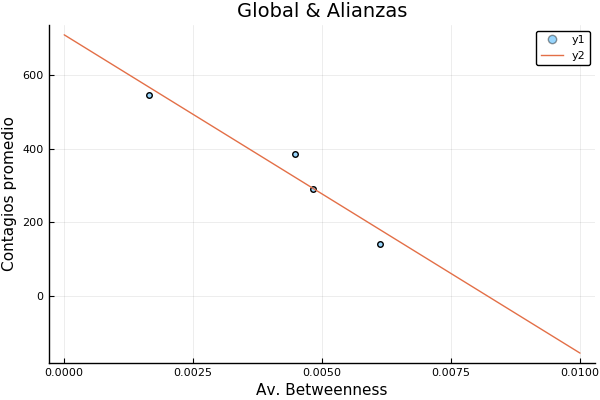

In [95]:
w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]

equation(x) = -86244.9*x + 708.06 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas",
    xlabel = "Av. Betweenness",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.01:0.01, 
    legend = true)


## Análisis de coberturas (Alianzas)

### Encontramos la regresión

In [96]:
reg_ab_al = regresion_lineal("Alianzas", "Av. Betweenness")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
               Estimate Std.Error  t value Pr(>|t|)
(Intercept)     981.267   146.034  6.71945   0.0941
x1           -1.37974e5   28155.3 -4.90046   0.1282


In [97]:
r_2 = round.(r2(reg_ab_al), digits=5)

0.96002

In [98]:
round.(stderror(reg_ab_al), digits=5);

In [99]:
round.(predict(reg_ab_al), digits=5);

### Gráfica de cobertura (Av. Betweenness vs. Cobertura. Alianzas)

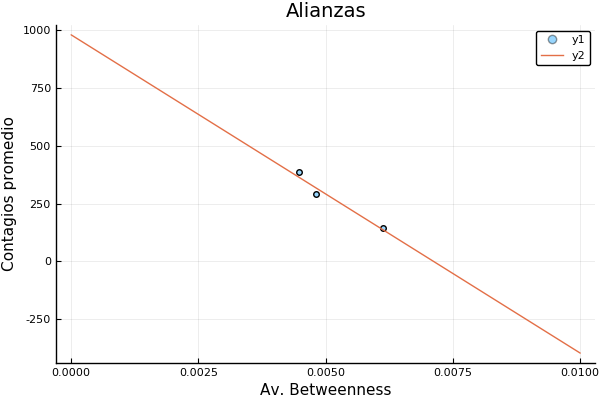

In [100]:
w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

equation(x) = -1.37974e5*x + 981.267 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas",
    xlabel = "Av. Betweenness",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.001:0.01, 
    legend = true)


## Análisis de coberturas (Alianzas & Aerolíneas)

### Encontramos la regresión

In [101]:
reg_ab_aa = regresion_lineal("Alianzas y Aerolíneas", "Av. Betweenness")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error t value Pr(>|t|)
(Intercept)   38.6067   1.86932 20.6528   <1e-68
x1            -25.908    2.4871 -10.417   <1e-22


In [102]:
r_2 = round.(r2(reg_ab_aa), digits=5)

0.1721

In [103]:
round.(stderror(reg_ab_aa), digits=5);

In [104]:
round.(predict(reg_ab_aa), digits=5);

### Gráfica de cobertura (Betweenness vs. Cobertura. Alianzas & Aerolíneas)

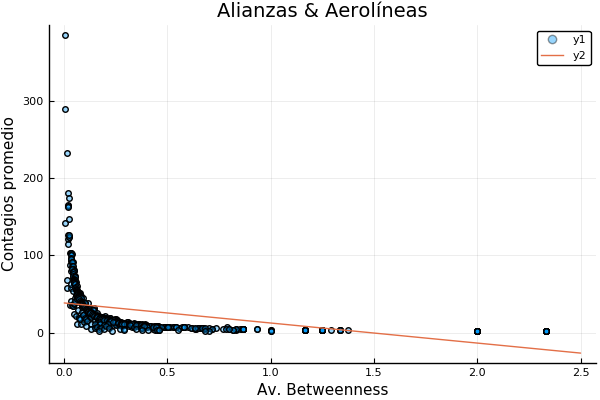

In [105]:

w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = -25.908*x + 38.6067 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas",
    xlabel = "Av. Betweenness",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.1:2.5, 
    legend = true)


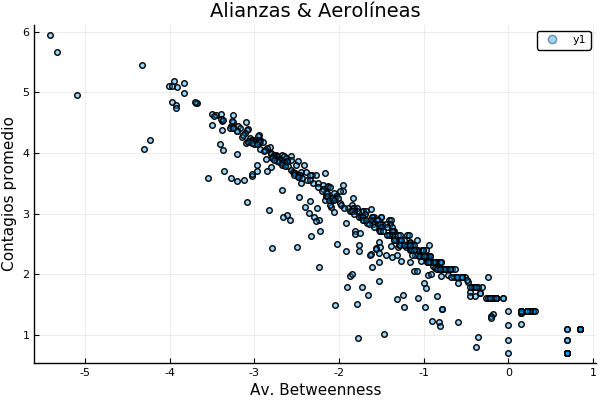

In [161]:

w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, log(w[i]))
    y = push!(y, log(c[i]))
end


#equation(x) = -25.908*x + 38.6067 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas",
    xlabel = "Av. Betweenness",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:0.1:2.5, 
 #   legend = true)


## Análisis de coberturas (Aerolíneas)

### Encontramos la regresión

In [106]:
reg_ab_aer = regresion_lineal("Aerolíneas", "Av. Betweenness")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)   36.4025   1.53611  23.6979   <1e-83
x1           -24.0899   2.03791 -11.8209   <1e-27


In [107]:
r_2 = round.(r2(reg_ab_aer), digits=5)

0.21212

In [108]:
round.(stderror(reg_ab_aer), digits=5);

In [109]:
round.(predict(reg_ab_aer), digits=5);

### Gráfica de cobertura (Betweenness vs. Cobertura. Aerolíneas)

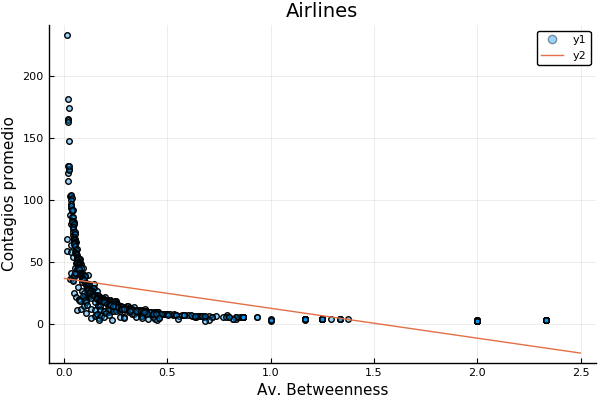

In [110]:

w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = -24.0899*x + 36.4025 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Airlines",
    xlabel = "Av. Betweenness",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.01:2.5, 
    legend = true)


## Análisis de coberturas para Global Clustering Coefficient

### Encontramos la regresión lineal (Global y Alianzas)

In [111]:
reg_gcc_ga = regresion_lineal("Global y Alianzas", "Global Clustering Coefficient")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  -114.121   86.6277 -1.31738   0.3184
x1            10916.4   1986.64  5.49487   0.0316


In [112]:
r_2 = round.(r2(reg_gcc_ga), digits=5)

0.93788

In [113]:
round.(stderror(reg_gcc_ga), digits=5);

In [114]:
round.(predict(reg_gcc_ga), digits=5);

### Gráfica de cobertura (Global Clustering Coefficient vs. Cobertura. Global & Alianzas)

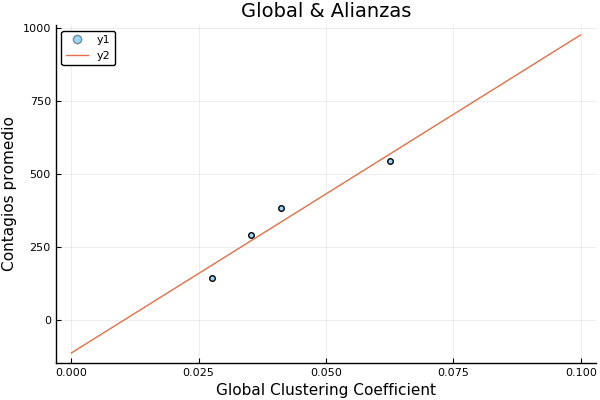

In [115]:
#x = ["Global", "Star Alliance", "Sky Team", "oneworld"]

w = tabla_info_net[:, 7] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]

equation(x) = 10916.4*x - 114.121 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas",
    xlabel = "Global Clustering Coefficient",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.01:0.1, 
    legend = true)


## Análisis de coberturas (Alianzas)

### Encontramos la regresión

In [116]:
reg_gcc_al = regresion_lineal("Alianzas", "Global Clustering Coefficient")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  -348.316   24.6776 -14.1147   0.0450
x1            17892.4   702.411  25.4728   0.0250


In [117]:
r_2 = round.(r2(reg_gcc_al), digits=5)

0.99846

In [118]:
round.(stderror(reg_gcc_al), digits=5);

In [119]:
round.(predict(reg_gcc_al), digits=5);

### Gráfica de cobertura (Global Clustering Coefficient vs. Cobertura. Alianzas)

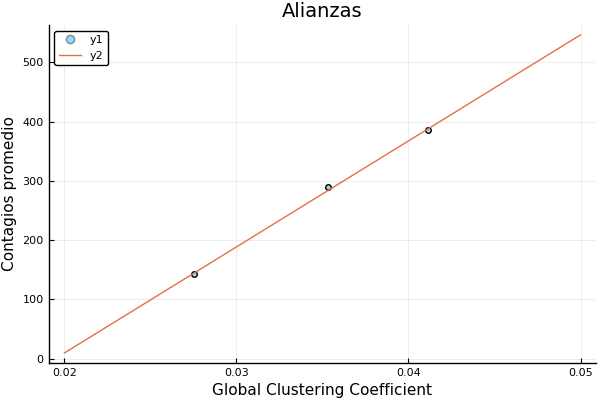

In [120]:

w = tabla_info_net[:, 7] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

equation(x) = 17892.4*x - 348.316 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas",
    xlabel = "Global Clustering Coefficient",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0.02:0.01:0.05, 
    legend = true)


## Análisis de coberturas (Alianzas & Aerolíneas)

### Encontramos la regresión

In [121]:
reg_gcc_aa = regresion_lineal("Alianzas y Aerolíneas", "Global Clustering Coefficient")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)   27.1854   1.70139  15.9783   <1e-46
x1            -25.654   20.0821 -1.27745   0.2020


In [122]:
r_2 = round.(r2(reg_gcc_aa), digits=5)

0.00312

In [123]:
round.(stderror(reg_gcc_aa), digits=5);

In [124]:
round.(predict(reg_gcc_aa), digits=5);

### Gráfica de cobertura (Global Clustering Coefficient vs. Cobertura. Alianzas & Aerolíneas)

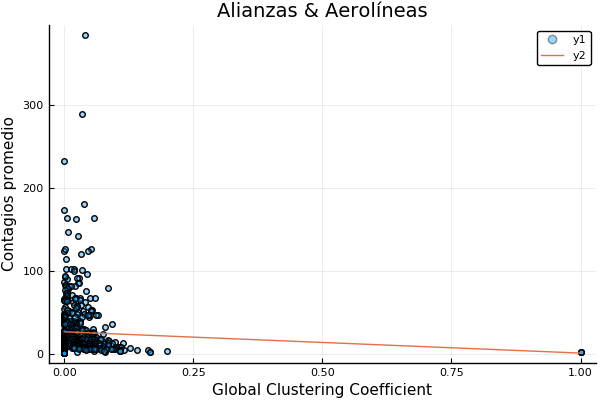

In [125]:
#x = ["Global", "Star Alliance", "Sky Team", "oneworld"]

w = tabla_info_net[:, 7] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = -25.654*x + 27.1854 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas",
    xlabel = "Global Clustering Coefficient",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:1:1, 
    legend = true)


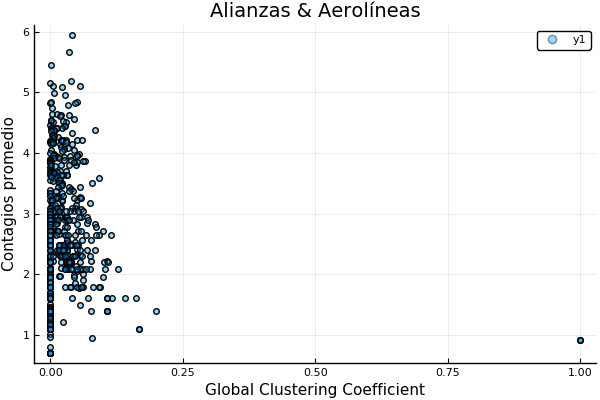

In [164]:
#x = ["Global", "Star Alliance", "Sky Team", "oneworld"]

w = tabla_info_net[:, 7] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, log(c[i]))
end


#equation(x) = -25.654*x + 27.1854 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas",
    xlabel = "Global Clustering Coefficient",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:1:1, 
#    legend = true)


## Análisis de coberturas (Aerolíneas)

### Encontramos la regresión

In [126]:
reg_gcc_aer = regresion_lineal("Aerolíneas", "Global Clustering Coefficient")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)   25.8225   1.42849  18.0767   <1e-56
x1           -27.5532    16.821 -1.63802   0.1020


In [127]:
r_2 = round.(r2(reg_gcc_aer), digits=5)

0.00514

In [128]:
round.(stderror(reg_gcc_aer), digits=5);

In [129]:
round.(predict(reg_gcc_aer), digits=5);

### Gráfica de cobertura (Global Clustering Coefficient vs. Cobertura. Aerolíneas)

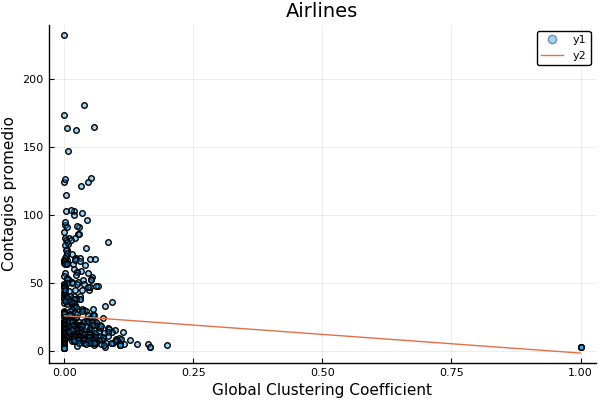

In [130]:

w = tabla_info_net[:, 7] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = -27.5532*x + 25.8225 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Airlines",
    xlabel = "Global Clustering Coefficient",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.1:1, 
    legend = true)


### Similitud entre las redes de Aerolíneas (monocapas). Coeficiente de Jaccard

$$ J(A, B) = \frac{|A \cap B|}{|A \cup B|}$$

donde $A$ y $B$ son conjuntos

#### Tabla de coeficientes de Jaccard de las aerolíneas

In [155]:
#Checar

j_nodo = []
j_enlace = []
nombres = []


j_nodo = push!(j_nodo, "Jaccard C. Nodes")

j_enlace = push!(j_enlace, "Jaccard C. Links")

nombres =  push!(nombres, "Airline Codes")


k = 0

for i in 6:length(lista_aerolineas)
    
    nombres = push!(nombres, lista_aerolineas[i])
    
    inters_nodo = abs(tabla_info_net[i, 2])    
    #@show inters_nodo
    suma_nodo = abs(tabla_info_net[2, 2]) + abs(tabla_info_net[i, 2])
    #@show suma_nodo
    jaccy_nodo = inters_nodo / (suma_nodo - inters_nodo)
    #@show jaccy_nodo
    j_nodo = push!(j_nodo, jaccy_nodo)
    #@show j_nodo
    
    inters_enlace = abs(tabla_info_net[i, 3])
    suma_enlace = abs(tabla_info_net[2, 3]) + abs(tabla_info_net[i, 3])
    jaccy_enlace = inters_enlace / (suma_enlace - inters_enlace)
    j_enlace = push!(j_enlace, jaccy_enlace)
    #@show j_enlace
    

end

jaccard_tabla = hcat(nombres, j_nodo, j_enlace)

return jaccard_tabla

522×3 Array{Any,2}:
 "Airline Codes"   "Jaccard C. Nodes"   "Jaccard C. Links"
 "AA"             0.0843099            0.0382256          
 "TK"             0.078776             0.0163177          
 "DL"             0.0748698            0.0346297          
 "MU"             0.0625               0.0317288          
 "CZ"             0.0611979            0.0374702          
 "UA"             0.0598958            0.0273472          
 "FR"             0.0572917            0.0750612          
 "BA"             0.0569661            0.011241           
 "AF"             0.0559896            0.0136585          
 "LH"             0.0553385            0.0153205          
 "CA"             0.0546875            0.0237512          
 "SU"             0.0481771            0.0135376          
 ⋮                                                        
 "H7"             0.000651042          6.04357e-5         
 "GY"             0.000651042          6.04357e-5         
 "EW"             0.000651042       

### Distribución de grado

In [145]:
function plot_distrib(distrib, tipo::String, titulo::String, color::String) #M::Array{Int64,2}

    distribucion = distrib

    graph = scatter(distribucion, fillcolor = color, markersize = 1, linealpha = 0.5,
    title = titulo,
    xlabel = "Grado",
    ylabel = "Frecuencia",
    xlims = (0,250), #obtener límites
    ylims = (0,850)) #obtener límites
end

plot_distrib (generic function with 1 method)

In [146]:
distrib_in_degree_G = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/global/grados/global_distrib_in_degree.csv", ',', Int64);
distrib_in_degree_SA = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Star_Alliance/grados/Star_Alliance_distrib_in_degree.csv", ',', Int64);
distrib_in_degree_OW = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/oneworld/grados/oneworld_distrib_in_degree.csv", ',', Int64);
distrib_in_degree_ST = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Sky_Team/grados/Sky_Team_distrib_in_degree.csv", ',', Int64);

In [147]:
hist_in_degree_G = plot_distrib(distrib_in_degree_G, "in", "Global In degree distrib.", "black");
hist_in_degree_SA = plot_distrib(distrib_in_degree_SA, "in", "Star Alliance In degree distrib.", "grey");
hist_in_degree_ST = plot_distrib(distrib_in_degree_ST, "in", "Sky Team In degree distrib.", "blue");
hist_in_degree_OW = plot_distrib(distrib_in_degree_OW, "in", "oneworld In degree distrib.", "purple");

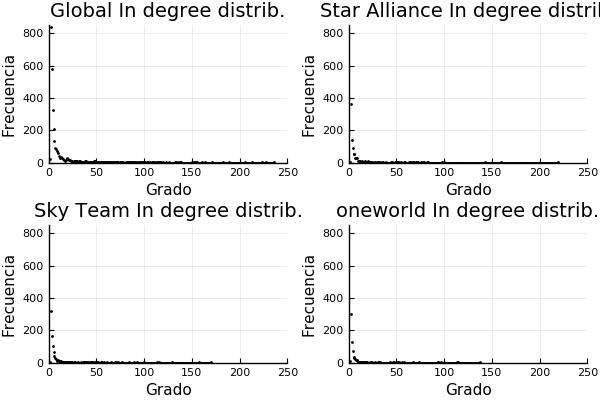

In [148]:
plot(hist_in_degree_G,hist_in_degree_SA,hist_in_degree_ST,hist_in_degree_OW,layout=(2,2),legend=false)

In [149]:
distrib_out_degree_G = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/global/grados/global_distrib_out_degree.csv", ',', Int64);
distrib_out_degree_SA = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Star_Alliance/grados/Star_Alliance_distrib_out_degree.csv", ',', Int64);
distrib_out_degree_OW = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/oneworld/grados/oneworld_distrib_out_degree.csv", ',', Int64);
distrib_out_degree_ST = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Sky_Team/grados/Sky_Team_distrib_out_degree.csv", ',', Int64);

In [150]:
hist_out_degree_G = plot_distrib(distrib_out_degree_G, "out", "Global Out degree distrib.", "black");
hist_out_degree_SA = plot_distrib(distrib_out_degree_SA, "out", "Star Alliance Out degree distrib.", "grey");
hist_out_degree_ST = plot_distrib(distrib_out_degree_ST, "out", "Sky Team Out degree distrib.", "blue");
hist_out_degree_OW = plot_distrib(distrib_out_degree_OW, "out", "oneworld Out degree distrib.", "purple");

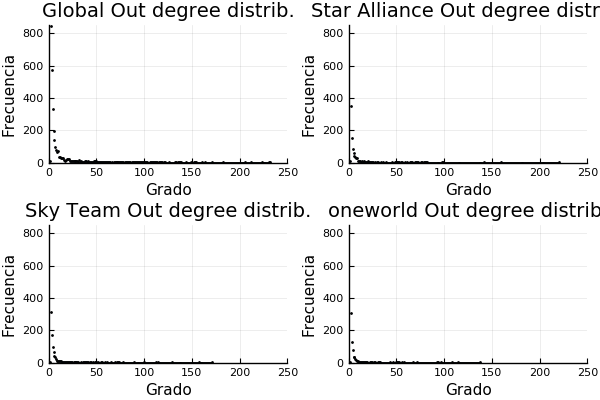

In [151]:
plot(hist_out_degree_G,hist_out_degree_SA,hist_out_degree_ST,hist_out_degree_OW,layout=(2,2),legend=false)

In [152]:
polyfit(x::Vector, y::Vector, deg::Int) = collect(v ^ p for v in x, p in 0:deg) \ y
x = [3072, 934, 900, 698]
y = [544.464, 384.997, 289.527, 142.492]
@show polyfit(x, y, 2)

polyfit(x, y, 2) = [-728.658, 1.48445, -0.000348308]


3-element Array{Float64,1}:
 -728.6578910167253      
    1.4844457278905954   
   -0.0003483080435850051

### Gráficas

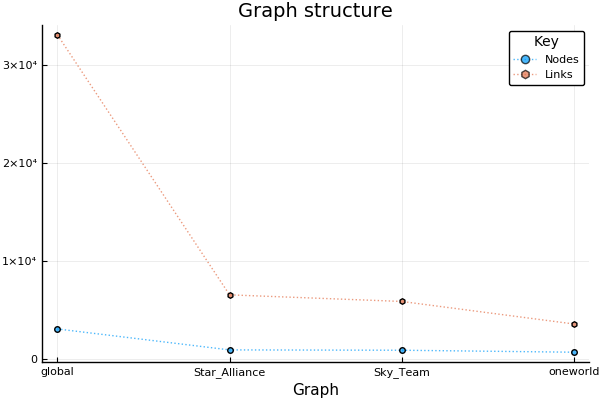

In [133]:
x = [tabla_info_net[2,1], tabla_info_net[3,1], tabla_info_net[4,1], tabla_info_net[5,1]]
y1 = [tabla_info_net[2,2], tabla_info_net[3,2], tabla_info_net[4,2], tabla_info_net[5,2]]
y2 = [tabla_info_net[2,3], tabla_info_net[3,3], tabla_info_net[4,3], tabla_info_net[5,3]]
y3 = [tabla_info_net[2,4], tabla_info_net[3,4], tabla_info_net[4,4], tabla_info_net[5,4]]
y4 = [tabla_info_net[2,5], tabla_info_net[3,5], tabla_info_net[4,5], tabla_info_net[5,5]]
y5 = [tabla_info_net[2,6], tabla_info_net[3,6], tabla_info_net[4,6], tabla_info_net[5,6]]
plot(x, y1, alpha=0.7, line=(:dot, 1),marker=([:circle :d]), markersize=4,legendtitle="Key", label="Nodes", xlabel="Graph", ylabel="", title="Graph structure")
plot!(x, y2, alpha=0.7, line=(:dot, 1),marker=([:hex :d]), markersize=4, label="Links")
#plot!(x, y3, alpha=0.7, line=(:dot, 1),marker=([:ltriangle :d]), markersize=4, label="Jaccard coef. Nodes")
#plot!(x, y4, alpha=0.7, line=(:dot, 1),marker=([:dtriangle :d]), markersize=4, label="Jaccard coef. Links")
#plot!(x, y5, alpha=0.7, line=(:dot, 1),marker=([:diamond :d]), markersize=4, label="Density")

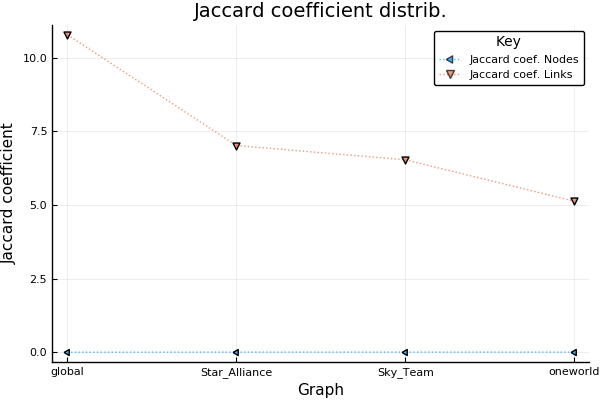

In [134]:
x = [tabla_info_net[2,1], tabla_info_net[3,1], tabla_info_net[4,1], tabla_info_net[5,1]]
y3 = [tabla_info_net[2,4], tabla_info_net[3,4], tabla_info_net[4,4], tabla_info_net[5,4]]
y4 = [tabla_info_net[2,5], tabla_info_net[3,5], tabla_info_net[4,5], tabla_info_net[5,5]]
#y5 = [tabla_info_net[2,6], tabla_info_net[3,6], tabla_info_net[4,6], tabla_info_net[5,6]]
plot(x, y3, alpha=0.7, line=(:dot, 1),marker=([:ltriangle :d]), markersize=5, legendtitle="Key", label="Jaccard coef. Nodes", xlabel="Graph", ylabel="Jaccard coefficient", title="Jaccard coefficient distrib.")
plot!(x, y4, alpha=0.7, line=(:dot, 1),marker=([:dtriangle :d]), markersize=5, label="Jaccard coef. Links")

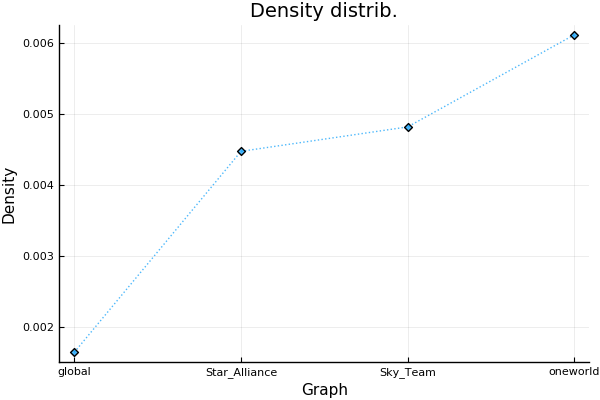

In [135]:
x = [tabla_info_net[2,1], tabla_info_net[3,1], tabla_info_net[4,1], tabla_info_net[5,1]]
y5 = [tabla_info_net[2,6], tabla_info_net[3,6], tabla_info_net[4,6], tabla_info_net[5,6]]
plot(x, y5, alpha=0.7, line=(:dot, 1),marker=([:diamond :d]), markersize=4, legend=false, xlabel="Graph", ylabel="Density", title="Density distrib.")

* Entre más similar es la red de la alianza o aerolínea con la red global, la cobertura o área de contagio es mayor.
* La densidad no pareciera que tiene relación con el área de infección.

In [136]:
x = ["Global", "Star Alliance", "Sky Team", "oneworld"]
y = [layer_cov_G[1], layer_cov_SA[1], layer_cov_ST[1], layer_cov_OW[1]]
b = bar(x, y,
    #color = "#0f87bf",
    title = "Cobertura promedio",
    xlabel = "Estructura de Red",
    ylabel = "Contagios promedio",
    legend = false,
    alpha = 0.4)

UndefVarError: UndefVarError: layer_cov_G not defined

In [137]:
x1 = ["Global"] 
x2 = ["Star Alliance"]
x3 = ["Sky Team"]
x4 = ["oneworld"]
y1 = [layer_cov_G[1]]
y2 = [layer_cov_SA[1]]
y3 = [layer_cov_ST[1]]
y4 = [layer_cov_OW[1]]
bar(x1,y1, color="black", alpha=0.7)
bar!(x2,y2, color="grey", alpha=0.7)
bar!(x3,y3, color="blue", alpha=0.7)
bar!(x4,y4, color="purple", alpha=0.7)

UndefVarError: UndefVarError: layer_cov_G not defined

In [138]:
x = ["Global", "Star Alliance", "Sky Team", "oneworld"]
y = [layer_cov_G[1], layer_cov_SA[1], layer_cov_ST[1], layer_cov_OW[1]]
b = bar(x, y, 
    #color = "#0f87bf",
    title = "Cobertura promedio",
    xlabel = "Estructura de Red",
    ylabel = "Contagios promedio",
    legend = false,
    alpha = 0.4)

UndefVarError: UndefVarError: layer_cov_G not defined

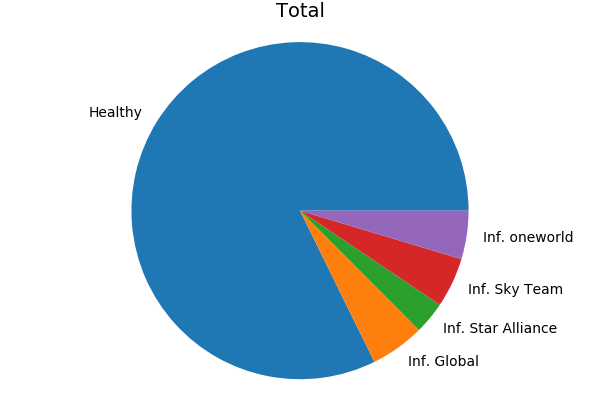

In [139]:
x1 = ["Healthy", "Inf. Global", "Inf. Star Alliance", "Inf. Sky Team", "Inf. oneworld"]
y1 = [82.277, 5.191, 3.108, 4.786, 4.638]
pie(x1, y1, title="Total", l=0.5)

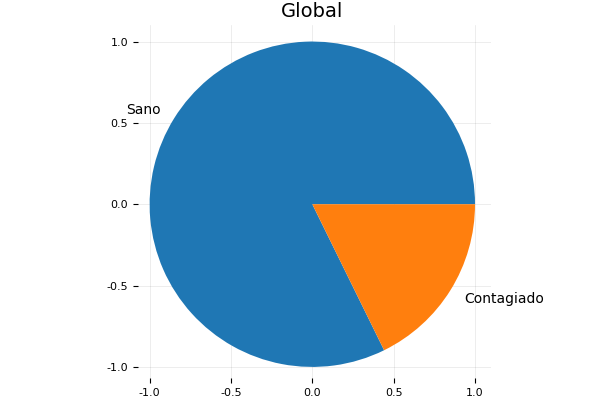

In [140]:
x = ["Sano", "Contagiado"]
y = [2527.54, 544.46]
plot(x, y, title = "Global", l = 0.5, seriestype =:pie)

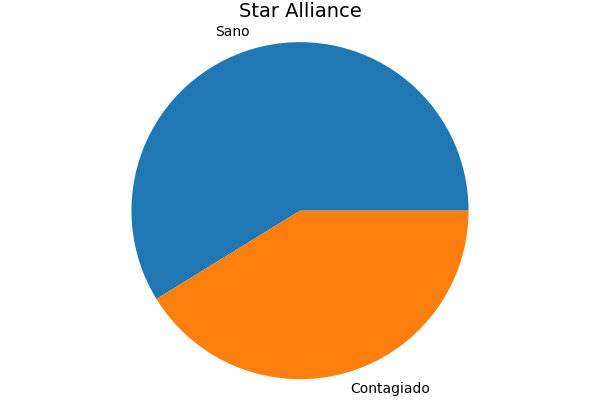

In [141]:
x = ["Sano", "Contagiado"]
y = [549.01, 384.99]
pie(x, y, title="Star Alliance", l=0.5)

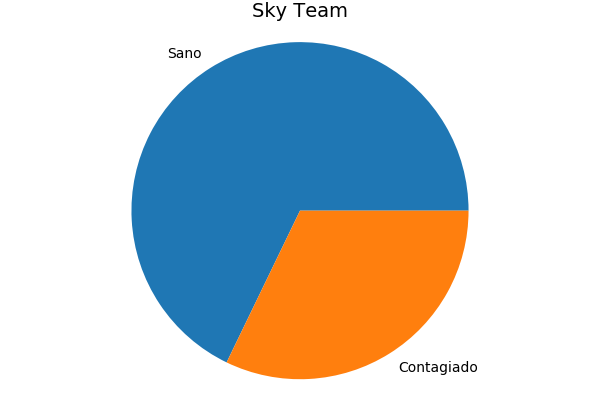

In [142]:
x = ["Sano", "Contagiado"]
y = [610.48, 289.52]
pie(x, y, title="Sky Team", l=0.5)

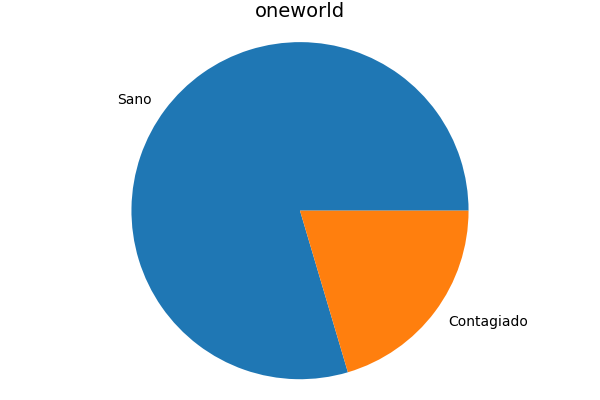

In [143]:
x = ["Sano", "Contagiado"]
y = [555.51, 142.49]
pie(x, y, title="oneworld", l=0.5)

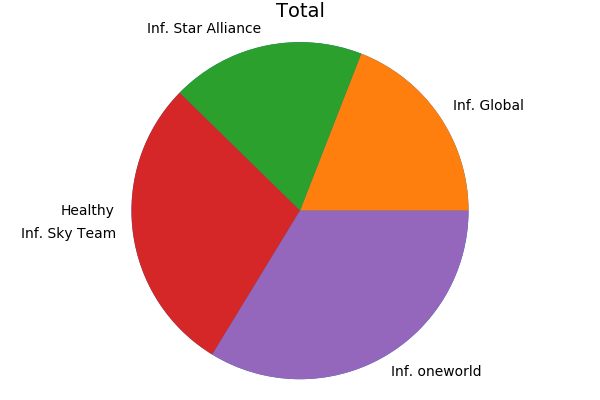

In [144]:
x1 = ["Healthy"]
y1 = [82.277]
x2 = ["Inf. Global", "Inf. Star Alliance", "Inf. Sky Team", "Inf. oneworld"]
y2 = [3.191, 3.108, 4.786, 5.638]
pie(x1, y1, title="Total", l=0.5)
pie!(x2, y2)